In [ ]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.collections as mcoll
import numpy as np

def get_segments(data: np.ndarray):
    points = data.reshape(-1, 2)
    segments = np.array([points[:-1], points[1:]]).transpose(1, 0, 2)
    return segments

def plot_2d(data: np.ndarray, axs = None, label = None, colormap: plt.cm = None):
    x = data[0::2]
    y = data[1::2]

    if not axs:
        fig, axs = plt.subplots()

    if colormap:
        colors = [mcolors.to_rgb(c) for c in colormap(np.linspace(0, 1, len(x)))]
        segments = get_segments(data)
        line_collection = mcoll.LineCollection(segments, linewidth=2, colors=colors)
        axs.add_collection(line_collection)
        axs.autoscale()
        axs.set_aspect('equal')
    else:
        axs.plot(x, y)
        axs.set_aspect('equal')

    if label:
        axs.set_title(label)

In [ ]:
def getPointsAlongCurve(segments: np.ndarray, pointsCount: int):
    segmentsLengths = [np.linalg.norm(s[0] - s[1]) for s in segments]
    totalLength = sum(segmentsLengths)
    points = np.zeros((pointsCount, 2))

    for i in range(pointsCount):
        currentLength = i / (pointsCount - 1) * totalLength
        for j, segmentLength in enumerate(segmentsLengths):
            if currentLength - segmentLength <= 1e-10:
                break
            currentLength -= segmentLength
        points[i] = segments[j][0] + (segments[j][1] - segments[j][0]) * currentLength / segmentLength
    return points

In [3]:
import pandas as pd

df = pd.DataFrame()

def addToDF(data, char):
    global df
    data = pd.DataFrame(data).T
    data["char"] = char
    df = pd.concat([df, data])

In [4]:
df

""


In [5]:
t = np.linspace(0, 2*np.pi, 101)

In [6]:
edgeCutFactor = .1
cutT = t * (1 - edgeCutFactor) + np.pi * edgeCutFactor

def cut(t, edgeCutFactor):
    return t * (1 - edgeCutFactor) + np.pi * edgeCutFactor

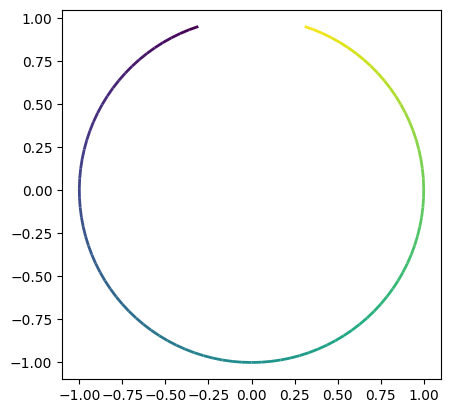

In [7]:
x = np.sin(-cutT)
y = np.cos(-cutT)
data = np.array([x, y]).T.flatten()

data = getPointsAlongCurve(get_segments(data), 101).flatten()
plot_2d(data, colormap=plt.cm.viridis)

addToDF(data, "o")

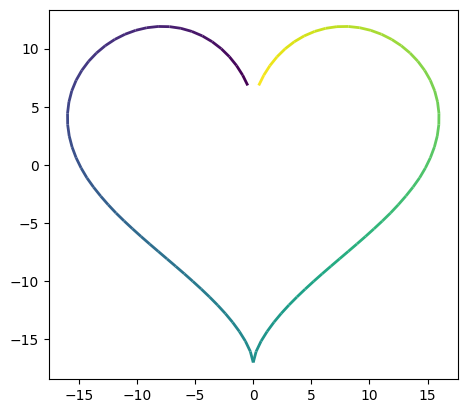

In [8]:
def xParm(t):
    return 16 * np.sin(t) ** 3

def yParm(t):
    return 13 * np.cos(t) - 5 * np.cos(2 * t) - 2 * np.cos(3 * t) - np.cos(4 * t)

data = np.array([xParm(-cutT), yParm(cutT)]).T.flatten()

data = getPointsAlongCurve(get_segments(data), 101).flatten()
plot_2d(data, colormap=plt.cm.viridis)

addToDF(data, "h")

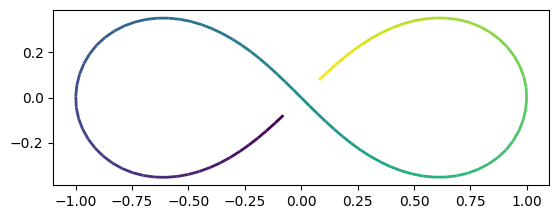

In [9]:
a = 1
b = .5
f = .05

def xParm(t):
    return a * np.cos(t) / (1 + np.sin(t) ** 2)

def yParm(t):
    return a * np.sin(t) * np.cos(t) / (1 + np.sin(t) ** 2)

data = np.array([xParm(cut(t, f) + np.pi * b), yParm(cut(t, f) + np.pi * b)]).T.flatten()
data = getPointsAlongCurve(get_segments(data), 101).flatten()

plot_2d(data, colormap=plt.cm.viridis)

addToDF(data, "i")

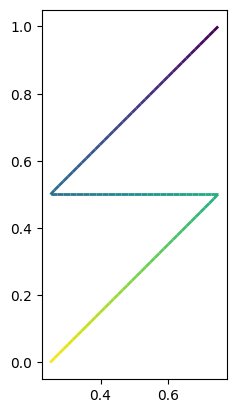

In [10]:
points = getPointsAlongCurve(np.array([[[.75, 1], [.25, .5]],
                    [[.25, .5], [.75, .5]],
                    [[.75, .5], [.25, 0]]]), 101)

data = points.flatten()

plot_2d(data, colormap=plt.cm.viridis)

addToDF(data, "z")

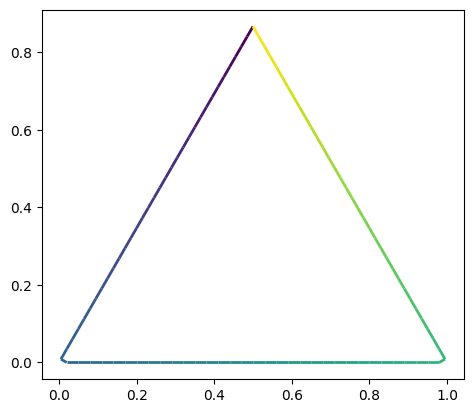

In [11]:
points = getPointsAlongCurve(get_segments(np.array([
    [1/2, np.sqrt(3)/2], [0, 0], [1, 0], [1/2, np.sqrt(3)/2]
    ])), 101)

data = points.flatten()

plot_2d(data, colormap=plt.cm.viridis)

addToDF(data, "t")

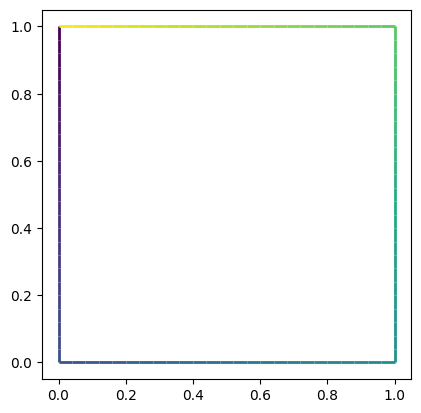

In [12]:
points = getPointsAlongCurve(get_segments(np.array([
    [0, 1], [0, 0], [1, 0], [1, 1], [0, 1]
    ])), 101)

data = points.flatten()

plot_2d(data, colormap=plt.cm.viridis)

addToDF(data, "f")

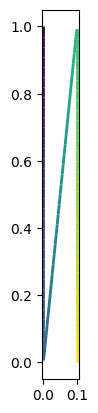

In [13]:
points = getPointsAlongCurve(get_segments(np.array([
    [0, 1], [0, 0], [.1, 1], [.1, 0]
    ])), 101)

data = points.flatten()

plot_2d(data, colormap=plt.cm.viridis)

addToDF(data, "l")

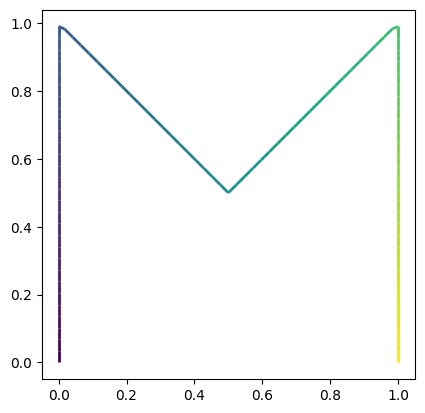

In [14]:
points = getPointsAlongCurve(get_segments(np.array([
    [0, 0], [0, 1], [.5, .5], [1, 1], [1, 0]
    ])), 101)

data = points.flatten()

plot_2d(data, colormap=plt.cm.viridis)

addToDF(data, "m")

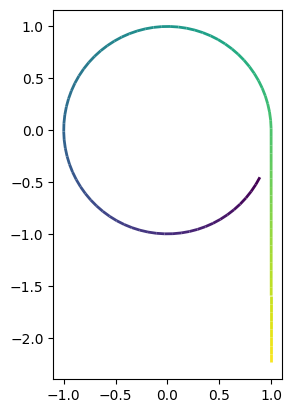

In [15]:
f = .1

tail = 1.5

def relu(x, a=0):
    return np.maximum(x - a, 0)

def xParm(t):
    mask = t * tail < np.pi * 2
    return np.where(mask, np.cos(t * tail), 1)

def yParm(t):
    mask = t * tail > -np.pi * 2
    return np.where(mask, np.sin(t * tail), t * tail / 4)

data = np.array([xParm(cut(t, f)), yParm(-cut(t, f))]).T.flatten()

data = getPointsAlongCurve(get_segments(data), 101).flatten()
plot_2d(data, colormap=plt.cm.viridis)

addToDF(data, "q")

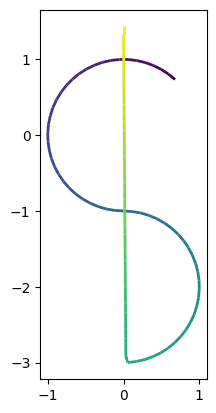

In [16]:
f = .01

scale = 1.25
bias = np.pi / 4

def scaleT(t, factor, bias):
    return t * factor + bias

def relu(x, a=0):
    return np.maximum(x - a, 0)

def xParm(t):
    t = scaleT(t, scale, bias)
    mask1 = t < np.pi * 6 / 4
    # print(mask1)
    dollar = np.where(mask1, np.cos(t), np.cos(t))

    mask2 = t < np.pi * 20 / 8
    return np.where(mask2, dollar, 0)

def yParm(t):
    t = scaleT(t, scale, bias)
    mask1 = t < np.pi * 6 / 4
    dollar = np.where(mask1, np.sin(t), -np.sin(t) - 2)

    mask2 = t < np.pi * 20 / 8
    return np.where(mask2, dollar, t / 6)

data = np.array([xParm(cut(t, f)), yParm(cut(t, f))]).T.flatten()

data = getPointsAlongCurve(get_segments(data), 101).flatten()
plot_2d(data, colormap=plt.cm.viridis)

addToDF(data, "s")

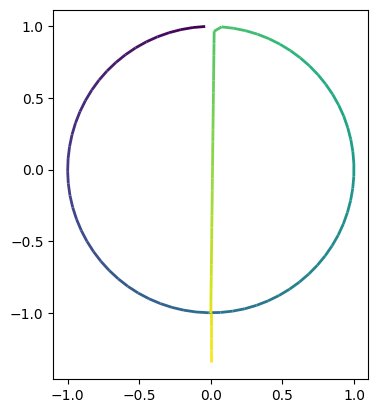

In [17]:
f = .01

scale = 1.25
bias = np.pi / 2

def scaleT(t, factor, bias):
    return t * factor + bias

def relu(x, a=0):
    return np.maximum(x - a, 0)

def xParm(t):
    t = scaleT(t, scale, bias)
    mask1 = t < np.pi * 5 / 2
    return np.where(mask1, np.cos(t), 0)

def yParm(t):
    t = scaleT(t, scale, bias)
    mask1 = t < np.pi * 5 / 2
    return np.where(mask1, np.sin(t), 1 - t / 4)


data = np.array([xParm(cut(t, f)), yParm(cut(t, f))]).T.flatten()

data = getPointsAlongCurve(get_segments(data), 101).flatten()
plot_2d(data, colormap=plt.cm.viridis)

addToDF(data, "y")

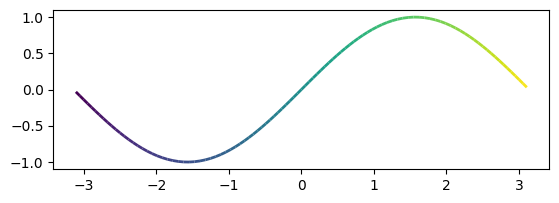

In [18]:
f = .01

scale = 1
bias = - np.pi

def scaleT(t, factor, bias):
    return t * factor + bias

def relu(x, a=0):
    return np.maximum(x - a, 0)

def xParm(t):
    t = scaleT(t, scale, bias)
    return t

def yParm(t):
    t = scaleT(t, scale, bias)
    return np.sin(t)


data = np.array([xParm(cut(t, f)), yParm(cut(t, f))]).T.flatten()

data = getPointsAlongCurve(get_segments(data), 101).flatten()
plot_2d(data, colormap=plt.cm.viridis)

addToDF(data, "~")

In [19]:
df.shape

(12, 203)

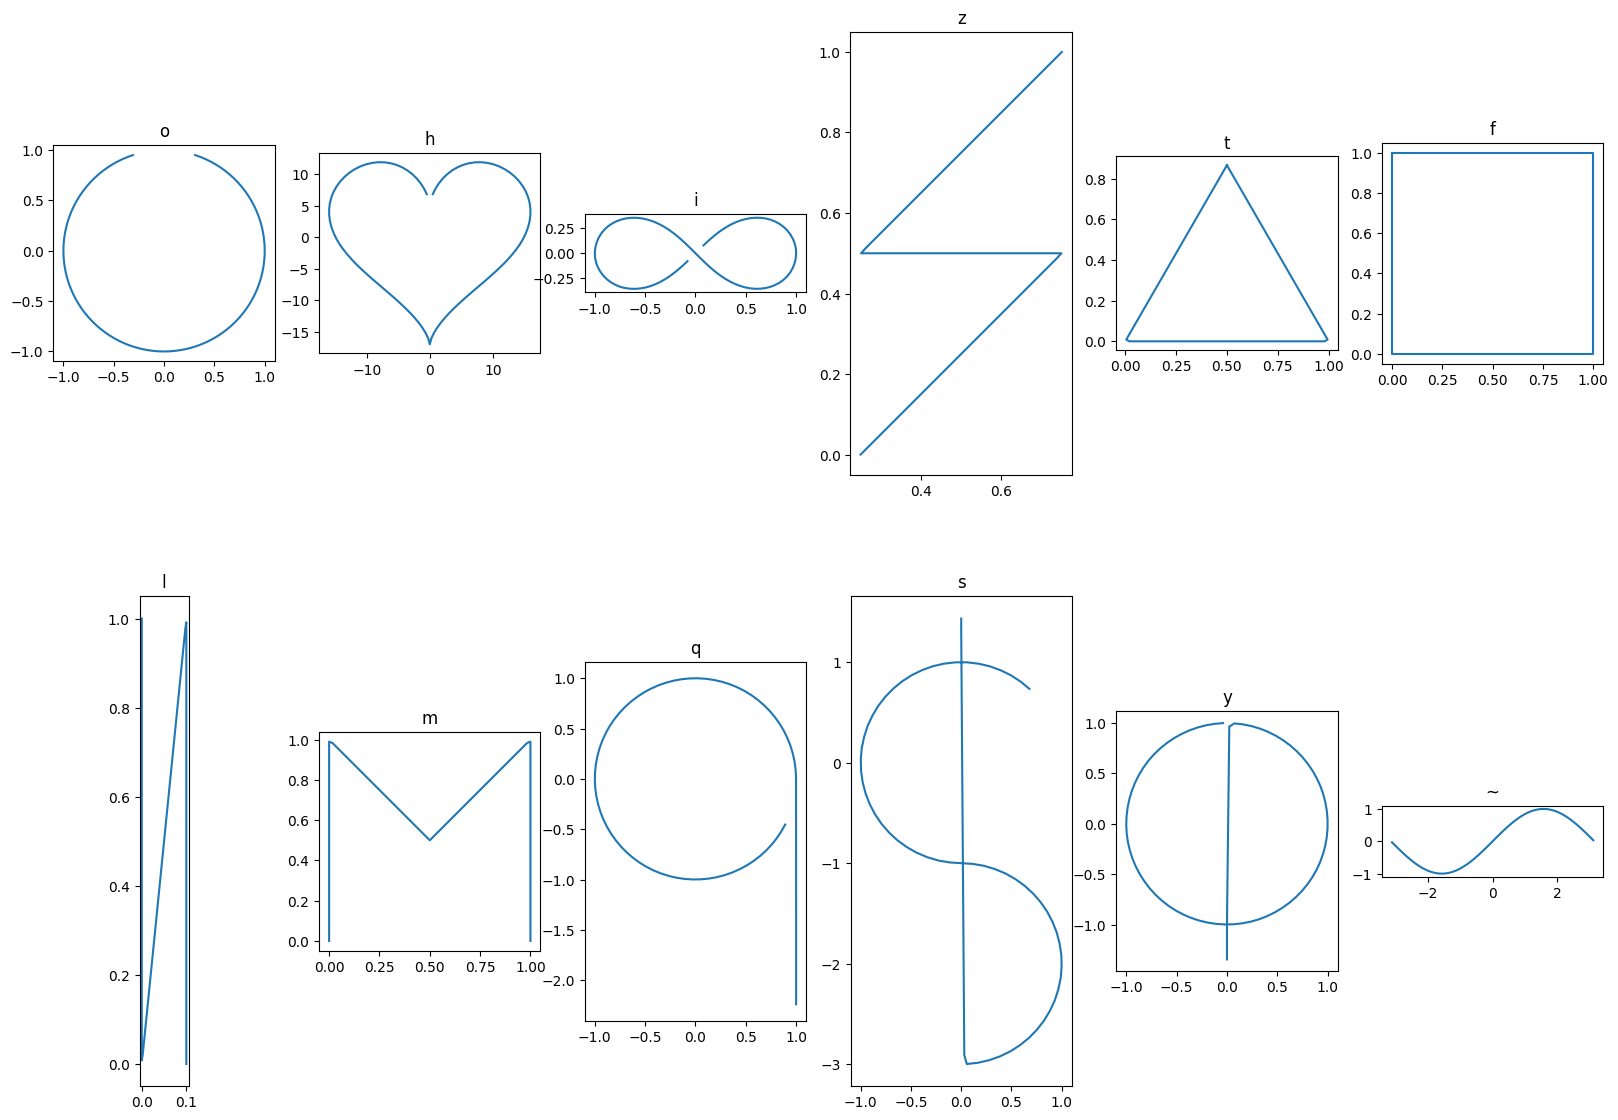

In [28]:
fig = plt.figure(figsize=(20, 14))
axs = fig.subplots(2, 6).flatten()

for i in range(12):
    plot_2d(df.drop(columns=["char"]).iloc[i], axs[i], label=str(df["char"].iloc[i]))

plt.show()

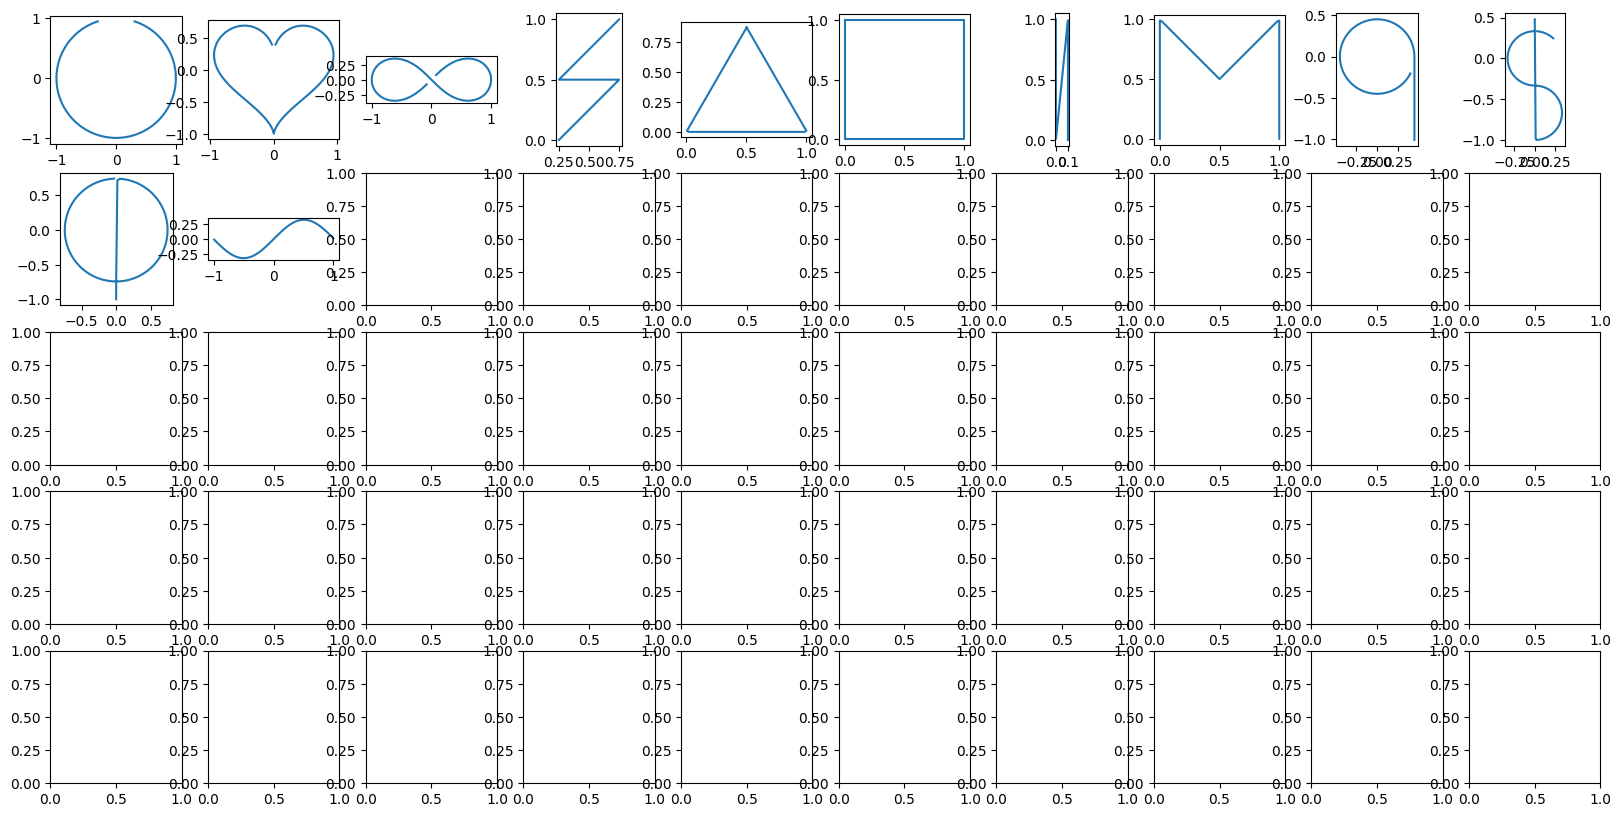

In [30]:
def normalize2d(x: pd.Series) -> np.ndarray:
    data = x.to_numpy().reshape(-1, 2)
    data = data.T
    data = data / (data.__abs__().max() - data.__abs__().min())
    data = data.T.flatten()
    return data

example_norm = df.drop(columns=["char"]).apply(normalize2d, axis=1)
example_norm = pd.DataFrame(example_norm.to_list(), index=df.index)
example_norm['char'] = df['char']

fig = plt.figure(figsize=(20, 10))
axs = fig.subplots(5, 10).flatten()

for i in range(12):
    plot_2d(example_norm.drop(columns=["char"]).iloc[i], axs[i])

In [31]:
df.to_csv("exampleData.csv", index=False)